In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv(r'C:\Users\Furqan\Desktop\Projectss\Go\prod_tables_lastyear\prod_tables_lastyear\rsoc_daily_terms_keywords_summary_latest_10lac.csv')
df.head()

,date,utm_source,utm_campaign,keyword,lander_count,search_count,click_count,unique_clicks,avg_rpc,fb_click_events
0,2025-05-13,bc,organic,t ball lesson plans,0,1,0,0,0.0,0
1,2025-05-13,bc,_organic,$1500 for dental implants research participati...,1,0,0,0,0.0,0
2,2025-05-13,bc,_organic,10 days in japan and korea,1,0,0,0,0.0,0
3,2025-05-13,bc,_organic,100 fha loan program in [state],1,0,0,0,0.0,0
4,2025-05-13,bc,_organic,100 fha loan program near me,1,0,0,0,0.0,0


In [5]:
df = pd.read_csv(r'C:\Users\Furqan\Desktop\Projectss\Go\prod_tables_lastyear\prod_tables_lastyear\rsoc_sum_daily_campaign_performance_latest_10lac.csv')
df.head()

,date,utm_source,utm_campaign,ad_impressions,ad_clicks,ad_ctr,lander_impressions,lander_sessions,lander_ctr,lander_kw_loaded,...,serp_ctr,clicks,pageviews,revenue,cost,profit,net_profit,RPC,RPMv,lander_impressions_no_clid
0,2025-05-13,go_nb,23846021145290792,1.0,0.0,0.000000,0,0,0.000000,0,...,0.000000,NaN,NaN,NaN,0.01,-0.01,-0.005,0.000000,0.000000,0.0
1,2025-05-13,go_nb,23846049626210792,203.0,8.0,0.039409,11,8,0.500000,11,...,0.250000,0.0,NaN,0.51,4.17,-3.66,-1.830,NaN,63.750000,0.0
2,2025-05-13,go_nb,23846049666910792,353.0,25.0,0.070821,30,24,0.708333,30,...,0.882353,14.0,NaN,3.49,2.40,1.09,0.545,0.249286,145.416666,0.0
3,2025-05-13,go_nb,23846049953210792,26.0,3.0,0.115385,4,4,0.500000,4,...,0.500000,0.0,NaN,0.42,0.31,0.11,0.055,NaN,105.000000,0.0
4,2025-05-13,go_nb,23846091006990792,1166.0,28.0,0.024014,30,28,0.392857,30,...,0.636364,0.0,NaN,15.12,24.10,-8.98,-4.490,NaN,540.000000,0.0


### Using relationships

In [8]:
import pandas as pd
import os
from itertools import combinations

def load_csvs(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, filename))
            dataframes[filename] = df
    return dataframes

def find_relationships(dfs):
    relationships = []
    for (name1, df1), (name2, df2) in combinations(dfs.items(), 2):
        for col1 in df1.columns:
            for col2 in df2.columns:
                if df1[col1].dtype == df2[col2].dtype:
                    overlap = df1[col1].dropna().isin(df2[col2].dropna()).mean()
                    if overlap > 0.8:  # Threshold can be adjusted
                        relationships.append({
                            'from_file': name1,
                            'from_column': col1,
                            'to_file': name2,
                            'to_column': col2,
                            'overlap': overlap
                        })
    return relationships

# Example usage
csv_folder = r'C:\Users\Furqan\Desktop\Projectss\Go\prod_tables_lastyear\prod_tables_lastyear'
dfs = load_csvs(csv_folder)
rels = find_relationships(dfs)

# Print found relationships
for rel in rels:
    print(f"{rel['from_file']}[{rel['from_column']}] --> {rel['to_file']}[{rel['to_column']}] (overlap: {rel['overlap']:.2f})")


agents_ads_latest_10lac.csv[id] --> agents_ad_creatives_latest_10lac.csv[id] (overlap: 0.99)
agents_ads_latest_10lac.csv[created_at] --> agents_ad_creatives_latest_10lac.csv[created_at] (overlap: 0.94)
agents_ads_latest_10lac.csv[ad_set_id] --> agents_ad_sets_latest_10lac.csv[id] (overlap: 1.00)
agents_ads_latest_10lac.csv[created_at] --> agents_ad_sets_latest_10lac.csv[created_at] (overlap: 0.94)
agents_ads_latest_10lac.csv[created_at] --> agents_campaigns_latest_10lac.csv[created_at] (overlap: 0.91)
agents_ad_creatives_latest_10lac.csv[campaign_id] --> agents_ad_sets_latest_10lac.csv[campaign_id] (overlap: 1.00)
agents_ad_creatives_latest_10lac.csv[created_at] --> agents_ad_sets_latest_10lac.csv[created_at] (overlap: 0.93)
agents_ad_creatives_latest_10lac.csv[campaign_id] --> agents_articles_latest_10lac.csv[campaign_id] (overlap: 0.99)
agents_ad_creatives_latest_10lac.csv[campaign_id] --> agents_campaigns_latest_10lac.csv[id] (overlap: 1.00)
agents_ad_creatives_latest_10lac.csv[crea

### Using Primary Keys

📁 Loading CSVs...
✅ 12 files loaded.
🔍 Detecting primary keys...
Found primary keys: {'agents_ads_latest_10lac.csv': 'id', 'agents_ad_creatives_latest_10lac.csv': 'id', 'agents_ad_sets_latest_10lac.csv': 'id', 'agents_ad_set_budget_history_latest_10lac.csv': 'id', 'agents_articles_latest_10lac.csv': 'id', 'agents_campaigns_latest_10lac.csv': 'id', 'agents_facebook_credentials_latest_10lac.csv': 'id', 'agents_keywords_latest_10lac.csv': 'id', 'agents_keyword_performance_latest_10lac.csv': 'id'}
🔗 Inferring foreign key relationships...
agents_ads_latest_10lac.csv:id ➝ agents_ad_creatives_latest_10lac.csv:id  (Overlap: 0.99)
agents_ads_latest_10lac.csv:ad_set_id ➝ agents_ad_sets_latest_10lac.csv:id  (Overlap: 1.0)
agents_ad_creatives_latest_10lac.csv:id ➝ agents_ads_latest_10lac.csv:id  (Overlap: 1.0)
agents_ad_creatives_latest_10lac.csv:campaign_id ➝ agents_campaigns_latest_10lac.csv:id  (Overlap: 1.0)
agents_ad_sets_latest_10lac.csv:campaign_id ➝ agents_campaigns_latest_10lac.csv:id  (O

C:\Users\Furqan\AppData\Local\Temp\ipykernel_16420\1472668533.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Furqan\AppData\Local\Temp\ipykernel_16420\1472668533.py:84: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(output_file, dpi=1000, bbox_inches='tight')


✅ Relationship graph saved as 'relationships_graph.png'


c:\Users\Furqan\Desktop\Projectss\Go\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


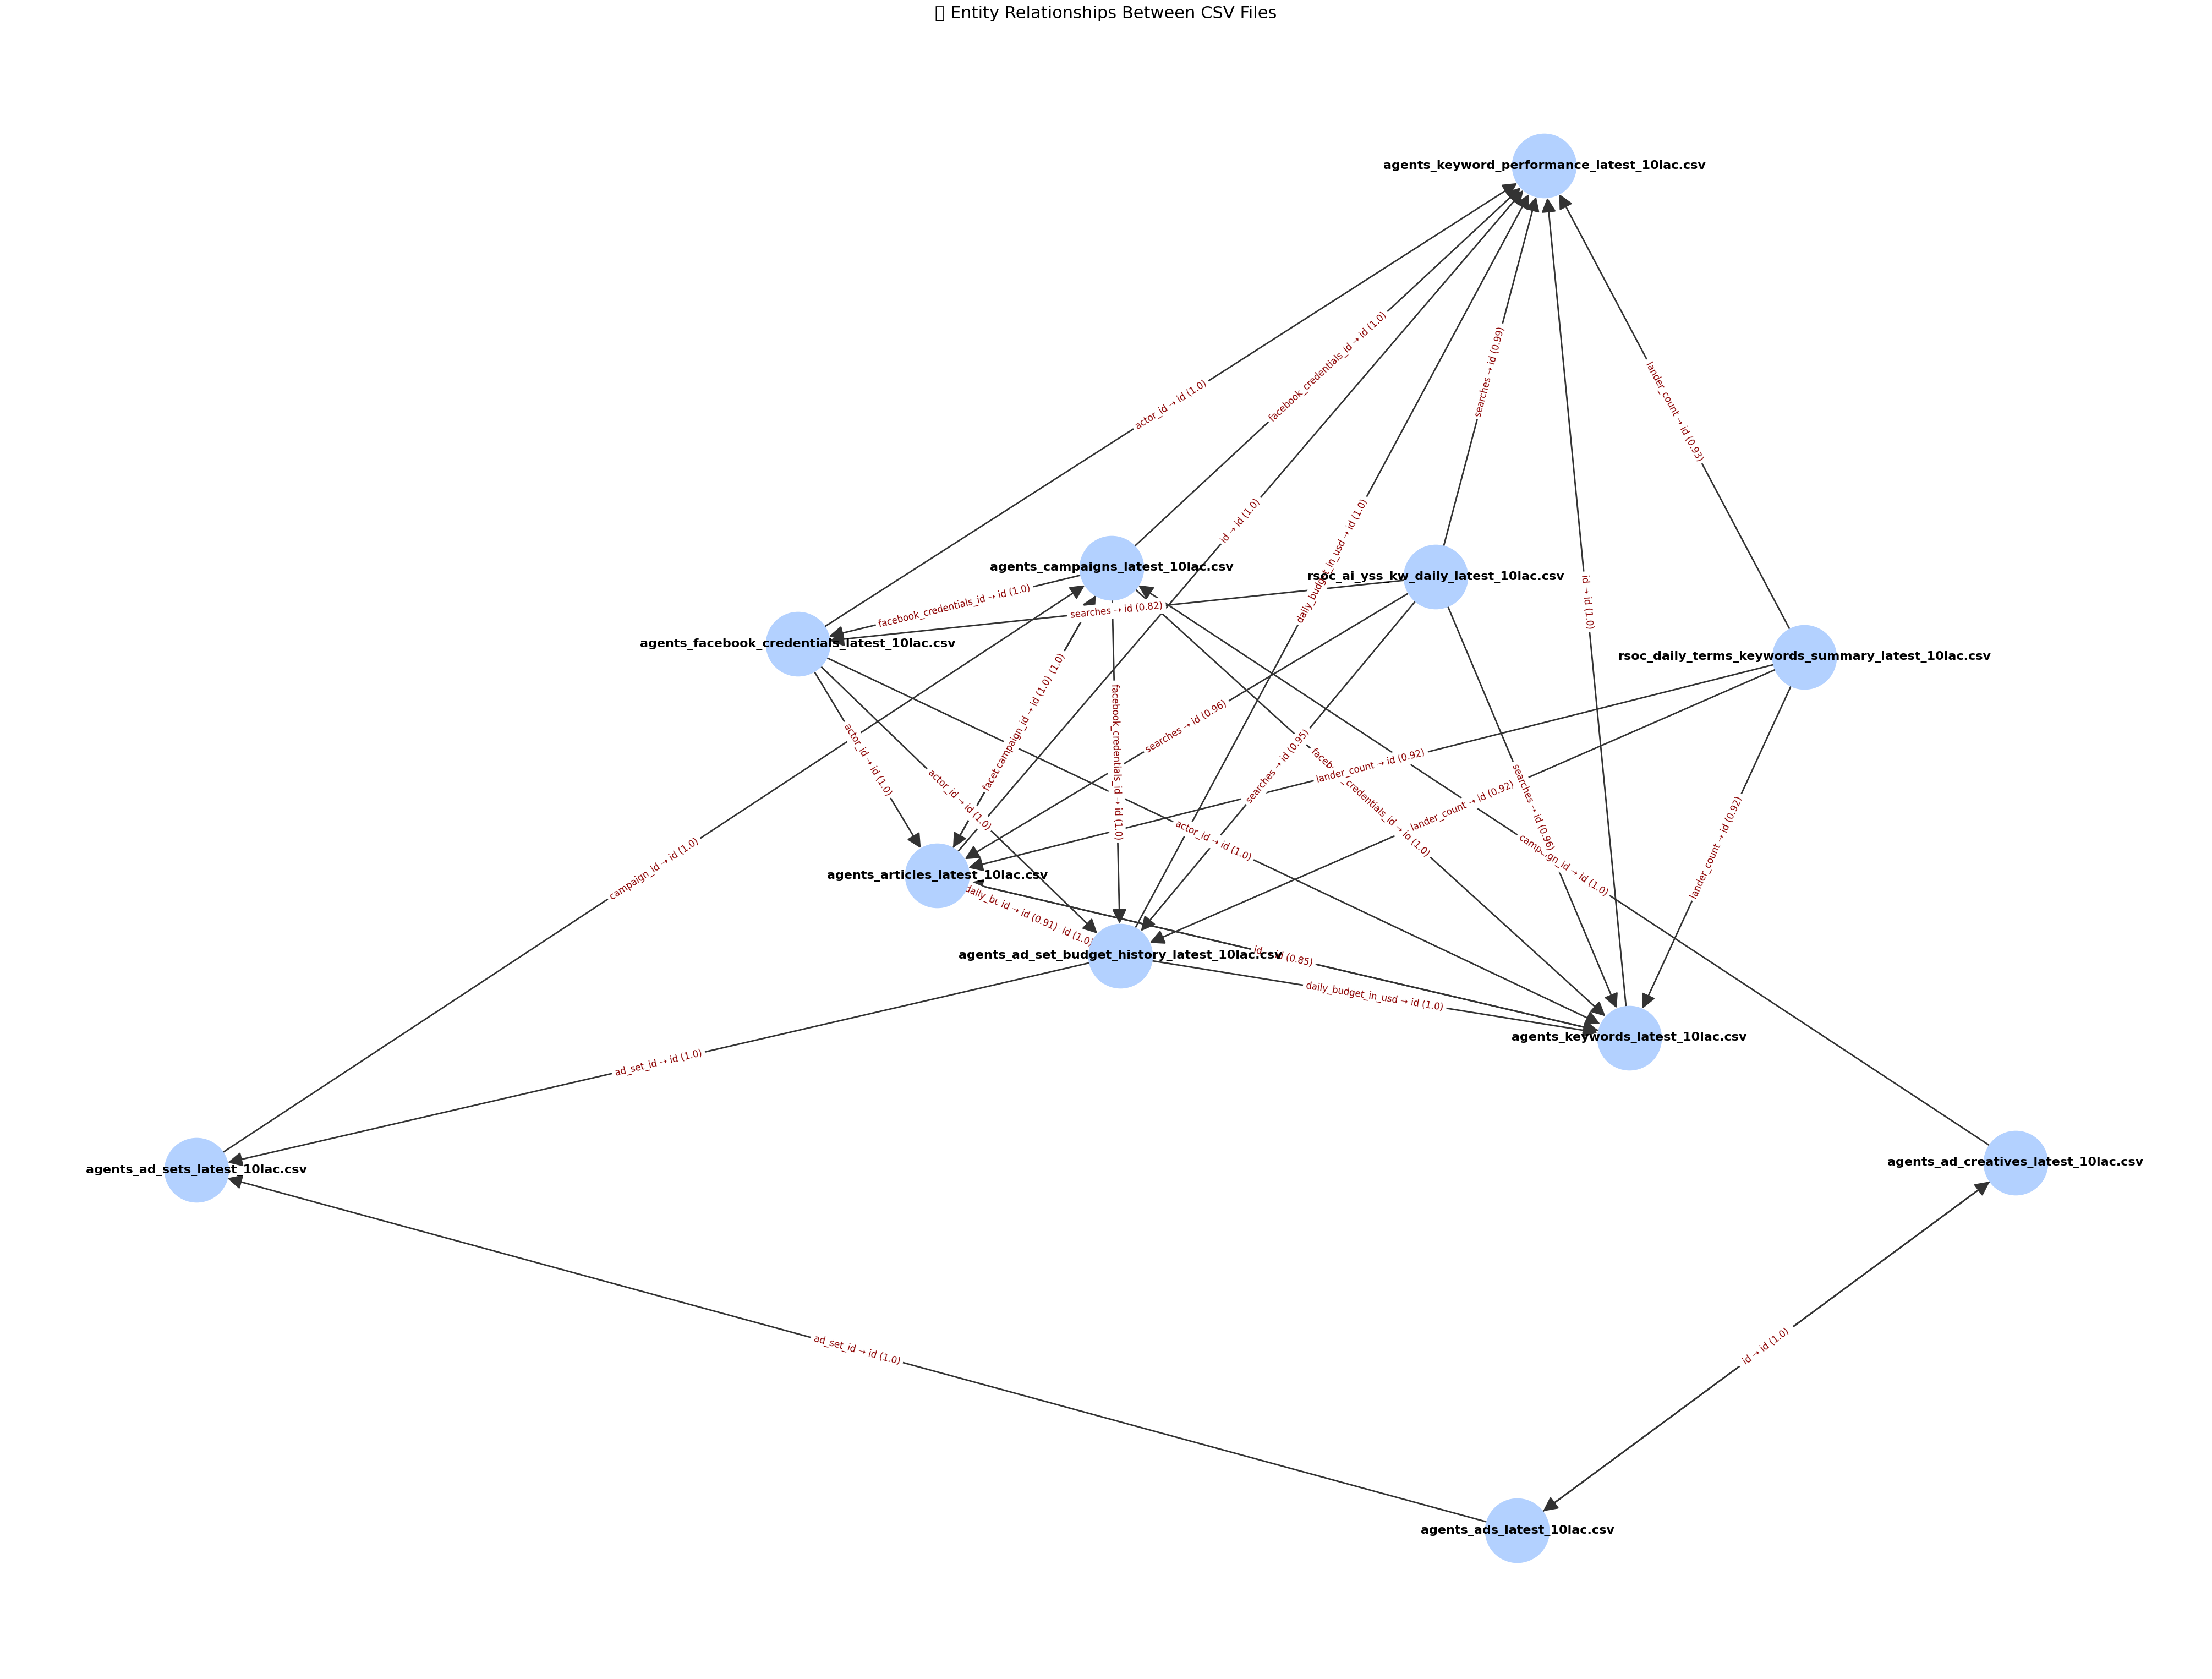

In [12]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Load all CSVs from a folder
def load_csvs(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, filename))
            dataframes[filename] = df
    return dataframes

# Detect primary key columns (unique and non-null)
def find_primary_keys(dataframes):
    primary_keys = {}
    for fname, df in dataframes.items():
        for col in df.columns:
            if df[col].is_unique and df[col].notna().all():
                primary_keys[fname] = col
                break
    return primary_keys

# Detect relationships between files
def find_foreign_keys(dataframes, primary_keys, threshold=0.8):
    relationships = []
    for file1, df1 in dataframes.items():
        for file2, df2 in dataframes.items():
            if file1 == file2:
                continue
            pk_col = primary_keys.get(file2)
            if pk_col is None:
                continue
            for col1 in df1.columns:
                try:
                    match_count = df1[col1].isin(df2[pk_col]).sum()
                    ratio = match_count / len(df1)
                    if ratio >= threshold:
                        relationships.append((file1, col1, file2, pk_col, round(ratio, 2)))
                except Exception:
                    continue
    return relationships

# Visualize relationships
import matplotlib.pyplot as plt
import networkx as nx

def visualize_relationships(relationships, output_file="relationships_graph.png"):
    G = nx.DiGraph()
    for src_file, src_col, dst_file, dst_col, score in relationships:
        label = f"{src_col} ➝ {dst_col} ({score})"
        G.add_edge(src_file, dst_file, label=label)

    # Relaxed layout: spreads nodes widely
    pos = nx.spring_layout(G, k=5, iterations=300)

    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(40, 30))  # Very large canvas
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=7000,
        node_color="#B3D1FF",
        font_size=16,
        font_weight='bold',
        edge_color="#333333",
        arrowsize=40,
        width=2
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='darkred',
        font_size=12
    )
    plt.title("🔍 Entity Relationships Between CSV Files", fontsize=22)
    plt.axis("off")
    plt.tight_layout()

    # Save the figure
    plt.savefig(output_file, dpi=1000, bbox_inches='tight')
    print(f"✅ Relationship graph saved as '{output_file}'")

    # Display the figure
    plt.show()



# Main runner
def main(folder_path):
    print("📁 Loading CSVs...")
    dataframes = load_csvs(folder_path)
    print(f"✅ {len(dataframes)} files loaded.")

    print("🔍 Detecting primary keys...")
    primary_keys = find_primary_keys(dataframes)
    print(f"Found primary keys: {primary_keys}")

    print("🔗 Inferring foreign key relationships...")
    relationships = find_foreign_keys(dataframes, primary_keys)
    for r in relationships:
        print(f"{r[0]}:{r[1]} ➝ {r[2]}:{r[3]}  (Overlap: {r[4]})")

    print("📊 Visualizing relationships...")
    visualize_relationships(relationships)

# Example usage
if __name__ == "__main__":
    folder = r"C:\Users\Furqan\Desktop\Projectss\Go\prod_tables_lastyear\prod_tables_lastyear"  # <--- Replace with your local path
    main(folder)


In [7]:
import pandas as pd
import os

In [8]:
df = pd.read_csv(r'C:\Users\Furqan\Desktop\Projectss\Go\prod_tables_lastyear\prod_tables_lastyear\rsoc_daily_terms_keywords_summary_latest_10lac.csv')
df.head()

,date,utm_source,utm_campaign,keyword,lander_count,search_count,click_count,unique_clicks,avg_rpc,fb_click_events
0,2025-05-13,bc,organic,t ball lesson plans,0,1,0,0,0.0,0
1,2025-05-13,bc,_organic,$1500 for dental implants research participati...,1,0,0,0,0.0,0
2,2025-05-13,bc,_organic,10 days in japan and korea,1,0,0,0,0.0,0
3,2025-05-13,bc,_organic,100 fha loan program in [state],1,0,0,0,0.0,0
4,2025-05-13,bc,_organic,100 fha loan program near me,1,0,0,0,0.0,0


In [9]:
# Keep only the specified columns
df = df[['keyword', 'search_count', 'click_count', 'unique_clicks', 'avg_rpc']]
df.head()

,keyword,search_count,click_count,unique_clicks,avg_rpc
0,t ball lesson plans,1,0,0,0.0
1,$1500 for dental implants research participati...,0,0,0,0.0
2,10 days in japan and korea,0,0,0,0.0
3,100 fha loan program in [state],0,0,0,0.0
4,100 fha loan program near me,0,0,0,0.0


In [10]:
df.describe()

,search_count,click_count,unique_clicks,avg_rpc
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.832882,0.523692,0.510256,0.050060
std,8.697822,5.857246,5.739817,0.203457
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1086.000000,783.000000,770.000000,17.140000


In [14]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch

# Select device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# Ensure 'keyword' column is clean (no NaNs, all strings)
df['keyword'] = df['keyword'].fillna('').astype(str)

# Encode keywords
embeddings = model.encode(
    df['keyword'].tolist(),
    show_progress_bar=True,
    device=device
)

Using device: cuda


Batches:   0%|          | 0/31250 [00:00<?, ?it/s]

In [15]:
embedding_df = pd.DataFrame(
    embeddings,
    columns=[f'embedding_{i}' for i in range(embeddings.shape[1])]
)
df_with_embeddings = pd.concat([df.reset_index(drop=True), embedding_df], axis=1)
df_with_embeddings.to_csv("keywords_with_embeddings.csv", index=False)
print("Done: Embeddings saved to 'keywords_with_embeddings.csv'")
df_with_embeddings.head()

Done: Embeddings saved to 'keywords_with_embeddings.csv'


,keyword,search_count,click_count,unique_clicks,avg_rpc,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_374,embedding_375,embedding_376,embedding_377,embedding_378,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383
0,t ball lesson plans,1,0,0,0.0,0.014418,0.058943,0.026357,-0.084926,-0.027683,...,0.115437,0.086885,0.007997,-0.030375,-0.017145,0.007892,-0.019517,-0.038143,-0.107361,-0.010771
1,$1500 for dental implants research participati...,0,0,0,0.0,-0.061432,0.038105,0.008679,-0.015547,-0.113317,...,-0.060012,0.048937,0.086332,0.035883,-0.029252,0.060258,0.030461,-0.142557,-0.047783,0.010256
2,10 days in japan and korea,0,0,0,0.0,-0.031265,0.071031,0.083260,-0.004133,0.039017,...,-0.006026,0.030929,0.081675,-0.103300,-0.080126,0.086785,-0.033565,-0.038732,-0.112156,0.013451
3,100 fha loan program in [state],0,0,0,0.0,0.024676,0.078736,-0.055967,-0.011650,-0.040705,...,-0.037816,0.061106,-0.025309,-0.003277,-0.038768,-0.032577,0.088630,-0.025346,0.010301,-0.076996
4,100 fha loan program near me,0,0,0,0.0,0.049765,0.066443,-0.068079,-0.038702,-0.016193,...,0.002404,0.062047,-0.050929,-0.002451,-0.038068,-0.002898,0.093740,-0.026866,-0.047385,-0.072151


Loading data...
Data loaded and split into train/test sets.

Initializing XGBoost model...
Starting training...


c:\Users\Furqan\Desktop\Projectss\Go\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Furqan\Desktop\Projectss\Go\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Furqan\Desktop\Projectss\Go\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Furqan\Desktop\Projectss\Go\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predicto

Training completed in 82.36 seconds.

Running predictions on test set...
Prediction completed in 3.56 seconds.

XGBoost Evaluation:

search_count
  R² Score:  0.2181
  MSE:       57.7333
  MAE:       1.0152
----------------------------------------
click_count
  R² Score:  0.2121
  MSE:       26.7232
  MAE:       0.6724
----------------------------------------
unique_clicks
  R² Score:  0.2119
  MSE:       25.5951
  MAE:       0.6554
----------------------------------------
avg_rpc
  R² Score:  0.1927
  MSE:       0.0332
  MAE:       0.0684
----------------------------------------
Plotting results...


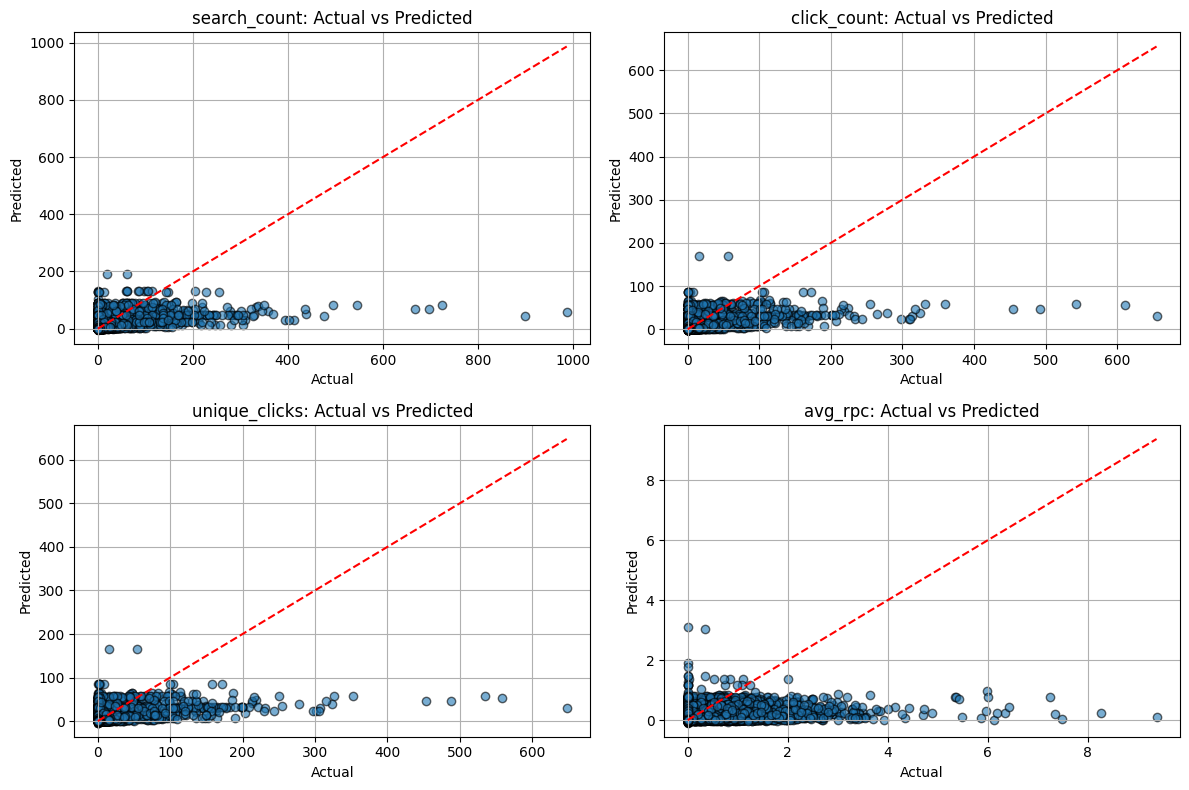


Total runtime: 97.21 seconds


In [21]:
import pandas as pd
import time
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Start overall timer
total_start = time.time()

# Load Data
print("Loading data...")
# df = pd.read_csv("keywords_with_embeddings.csv")
df = df_with_embeddings.drop(columns=['keyword'], errors='ignore')

X = df[[col for col in df.columns if col.startswith('embedding_')]]
y = df[['search_count', 'click_count', 'unique_clicks', 'avg_rpc']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data loaded and split into train/test sets.\n")

# Model definition
print("Initializing XGBoost model...")
xgb_model = MultiOutputRegressor(XGBRegressor(
    tree_method='hist',
    device=device,
    predictor='gpu_predictor',
    n_estimators=100,
    objective='reg:squarederror',
    random_state=42,
    verbosity=1  # Verbosity 1 shows warnings and performance info
))

# Training
print("Starting training...")
train_start = time.time()
xgb_model.fit(X_train, y_train)
train_end = time.time()
print(f"Training completed in {train_end - train_start:.2f} seconds.\n")

# Prediction
print("Running predictions on test set...")
pred_start = time.time()
y_pred = xgb_model.predict(X_test)
pred_end = time.time()
print(f"Prediction completed in {pred_end - pred_start:.2f} seconds.\n")

# Evaluation
target_names = y.columns.tolist()
print("XGBoost Evaluation:\n")
for i, col in enumerate(target_names):
    print(f"{col}")
    print(f"  R² Score:  {r2_score(y_test[col], y_pred[:, i]):.4f}")
    print(f"  MSE:       {mean_squared_error(y_test[col], y_pred[:, i]):.4f}")
    print(f"  MAE:       {mean_absolute_error(y_test[col], y_pred[:, i]):.4f}")
    print("-" * 40)

# Plotting
print("Plotting results...")
plt.figure(figsize=(12, 8))
for i, col in enumerate(target_names):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.6, edgecolors='k')
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.title(f'{col}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.savefig("xgboost_actual_vs_predicted.png")
plt.show()

total_end = time.time()
print(f"\nTotal runtime: {total_end - total_start:.2f} seconds")


In [22]:
import joblib

# Save the trained MultiOutput XGBoost model
joblib.dump(xgb_model, 'xgb_multioutput_model.pkl')
print("Model saved to xgb_multioutput_model.pkl")

Model saved to xgb_multioutput_model.pkl


# Inference Pipeline

In [25]:
import pandas as pd
import torch
import joblib
from time import sleep
import sys
from sentence_transformers import SentenceTransformer

# Load sentence transformer model once
device = 'cuda' if torch.cuda.is_available() else 'cpu'
embedder = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# Load trained XGBoost model
# model = joblib.load("xgb_multioutput_model.joblib")
model = xgb_model

# Target columns (in order)
target_cols = ['search_count', 'click_count', 'unique_clicks', 'avg_rpc']

def spinner(seconds=1.5):
    symbols = ['|', '/', '-', '\\']
    print("Generating embeddings: ", end='', flush=True)
    for i in range(int(seconds / 0.1)):
        sys.stdout.write('\rGenerating embeddings: ' + symbols[i % len(symbols)])
        sys.stdout.flush()
        sleep(0.1)
    print('\rGenerating embeddings: Done!     ')

def predict_from_keyword(keyword: str):
    
    # Show simulated progress
    spinner()
    
    # 1. Embed the keyword
    embedding = embedder.encode([keyword], device=device)  # Shape: (1, 384)
    
    # 2. Convert to DataFrame
    embedding_df = pd.DataFrame(embedding, columns=[f'embedding_{i}' for i in range(embedding.shape[1])])
    
    # 3. Predict using trained model
    preds = model.predict(embedding_df)
    
    # 4. Reverse log transform (if used during training)
    # preds = np.expm1(preds)  # Uncomment if log1p was applied

    # 5. Return results in a dictionary
    return dict(zip(target_cols, preds[0]))


In [ ]:
result = predict_from_keyword("Top SUV of this era")

# Format the dictionary output nicely
formatted_result = "{\n" + "\n".join(
    [f"    '{k}': {v}," for k, v in result.items()]
) + "\n}"

print("Predicted Metrics:", formatted_result)

Generating embeddings: Done!     
Predicted Metrics: {
    'search_count': 0.6158157587051392,
    'click_count': 0.6788358688354492,
    'unique_clicks': 0.26783105731010437,
    'avg_rpc': 0.04626142233610153,
}
